In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import math

In [2]:
df = pd.read_csv("Sampiyonlar Ligi 55-16.csv")

In [4]:
df.head()

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
0,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Inter Baku PIK › AZE (1),0-0,0-0,Rabotnicki › MKD (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Inter Baku PIK,AZE,Rabotnicki,MKD,0,0
1,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Anorthosis Famagusta › CYP (1),1-0,0-0,Pyunik › ARM (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Anorthosis Famagusta,CYP,Pyunik,ARM,1,0
2,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),BATE Borisov › BLR (1),2-0,0-0,Valur Reykjavik › ISL (1),NaN,NaN,NaN,NaN,2008-07-15,2008,BATE Borisov,BLR,Valur Reykjavik,ISL,2,0
3,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Tampere United › FIN (1),2-1,0-0,Buducnost › MNE (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Tampere United,FIN,Buducnost,MNE,2,1
4,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Dinamo Tirana › ALB (1),0-2,0-0,FK Modrica › BIH (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Dinamo Tirana,ALB,FK Modrica,BIH,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 20 columns):
Stage              4294 non-null object
Round              6554 non-null object
Group              2184 non-null object
Date               6554 non-null object
Team 1             6554 non-null object
FT                 6554 non-null object
HT                 6554 non-null object
Team 2             6554 non-null object
∑FT                2134 non-null object
ET                 128 non-null object
P                  56 non-null object
Comments           149 non-null object
Adj Date           6554 non-null object
Year               6554 non-null int64
Home Team          6554 non-null object
Home Team Ctry     6554 non-null object
Away Team          6554 non-null object
Away Team Ctry     6554 non-null object
Home Goal Count    6554 non-null int64
Away Goal Count    6554 non-null int64
dtypes: int64(3), object(17)
memory usage: 1.0+ MB


In [9]:
df[df["Home Team"].str.contains("Fener")]

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
39,Qualifying,Qual. Round 2 | Leg 1,NaN,(Wed) 30 Jul 2008 (W30),Fenerbahçe İstanbul SK › TUR (1),2-0,0-0,MTK › HUN (1),NaN,NaN,NaN,NaN,2008-07-30,2008,Fenerbahçe İstanbul SK,TUR,MTK,HUN,2,0
82,Qualifying,Qual. Round 3 | Leg 2,NaN,(Wed) 27 Aug 2008 (W34),Fenerbahçe İstanbul SK › TUR (4),2-1,0-0,Partizan Belgrade › SRB (4),4-3 (agg.),NaN,NaN,NaN,2008-08-27,2008,Fenerbahçe İstanbul SK,TUR,Partizan Belgrade,SRB,2,1
108,Group,Matchday ?,G,(Tue) 30 Sep 2008 (W39),Fenerbahçe İstanbul SK › TUR (6),0-0,0-0,Dinamo Kiev › UKR (6),NaN,NaN,NaN,NaN,2008-09-30,2008,Fenerbahçe İstanbul SK,TUR,Dinamo Kiev,UKR,0,0
124,Group,Matchday ?,G,(Tue) 21 Oct 2008 (W42),Fenerbahçe İstanbul SK › TUR (7),2-5,1-3,Arsenal FC › ENG (5),NaN,NaN,NaN,NaN,2008-10-21,2008,Fenerbahçe İstanbul SK,TUR,Arsenal FC,ENG,2,5
157,Group,Matchday ?,G,(Tue) 25 Nov 2008 (W47),Fenerbahçe İstanbul SK › TUR (9),1-2,0-2,FC Porto › POR (5),NaN,NaN,NaN,NaN,2008-11-25,2008,Fenerbahçe İstanbul SK,TUR,FC Porto,POR,1,2
286,Qualifying,Qual. Round 3 | Leg 2,NaN,(Tue) 27 Aug 2002 (W34),Fenerbahçe İstanbul SK › TUR (2),0-2,0-0,Feyenoord Rotterdam › NED (2),0-3 (agg.),NaN,NaN,NaN,2002-08-27,2002,Fenerbahçe İstanbul SK,TUR,Feyenoord Rotterdam,NED,0,2
692,NaN,Round 1 | Leg 2,NaN,(Wed) 7 Oct 1964 (W40),Fenerbahçe İstanbul SK › TUR (2),0-1,0-0,DWS Amsterdam › NED (2),1-4 (agg.),NaN,NaN,NaN,1964-10-07,1964,Fenerbahçe İstanbul SK,TUR,DWS Amsterdam,NED,0,1
1255,Group,Matchday ?,E,(Wed) 28 Sep 2005 (W39),Fenerbahçe İstanbul SK › TUR (2),3-0,1-0,PSV Eindhoven › NED (2),NaN,NaN,NaN,NaN,2005-09-28,2005,Fenerbahçe İstanbul SK,TUR,PSV Eindhoven,NED,3,0
1270,Group,Matchday ?,E,(Wed) 19 Oct 2005 (W42),Fenerbahçe İstanbul SK › TUR (3),3-3,1-0,FC Schalke 04 › GER (3),NaN,NaN,NaN,NaN,2005-10-19,2005,Fenerbahçe İstanbul SK,TUR,FC Schalke 04,GER,3,3
1302,Group,Matchday ?,E,(Wed) 23 Nov 2005 (W47),Fenerbahçe İstanbul SK › TUR (5),0-4,0-1,AC Milan › ITA (5),NaN,NaN,NaN,NaN,2005-11-23,2005,Fenerbahçe İstanbul SK,TUR,AC Milan,ITA,0,4


In [16]:
df[(df["Home Team"] == "Fenerbahçe İstanbul SK ") & (df["Year"]==2008)].sort_values(by="Adj Date")

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
2952,Knockout,Round of 16 | Leg 1,NaN,(Wed) 20 Feb 2008 (W7),Fenerbahçe İstanbul SK › TUR (9),3-2,1-1,Sevilla FC › ESP (9),NaN,NaN,NaN,NaN,2008-02-20,2008,Fenerbahçe İstanbul SK,TUR,Sevilla FC,ESP,3,2
2967,Knockout,Quarterfinals | Leg 1,NaN,(Wed) 2 Apr 2008 (W13),Fenerbahçe İstanbul SK › TUR (11),2-1,0-1,Chelsea FC › ENG (9),NaN,NaN,NaN,NaN,2008-04-02,2008,Fenerbahçe İstanbul SK,TUR,Chelsea FC,ENG,2,1
39,Qualifying,Qual. Round 2 | Leg 1,NaN,(Wed) 30 Jul 2008 (W30),Fenerbahçe İstanbul SK › TUR (1),2-0,0-0,MTK › HUN (1),NaN,NaN,NaN,NaN,2008-07-30,2008,Fenerbahçe İstanbul SK,TUR,MTK,HUN,2,0
82,Qualifying,Qual. Round 3 | Leg 2,NaN,(Wed) 27 Aug 2008 (W34),Fenerbahçe İstanbul SK › TUR (4),2-1,0-0,Partizan Belgrade › SRB (4),4-3 (agg.),NaN,NaN,NaN,2008-08-27,2008,Fenerbahçe İstanbul SK,TUR,Partizan Belgrade,SRB,2,1
108,Group,Matchday ?,G,(Tue) 30 Sep 2008 (W39),Fenerbahçe İstanbul SK › TUR (6),0-0,0-0,Dinamo Kiev › UKR (6),NaN,NaN,NaN,NaN,2008-09-30,2008,Fenerbahçe İstanbul SK,TUR,Dinamo Kiev,UKR,0,0
124,Group,Matchday ?,G,(Tue) 21 Oct 2008 (W42),Fenerbahçe İstanbul SK › TUR (7),2-5,1-3,Arsenal FC › ENG (5),NaN,NaN,NaN,NaN,2008-10-21,2008,Fenerbahçe İstanbul SK,TUR,Arsenal FC,ENG,2,5
157,Group,Matchday ?,G,(Tue) 25 Nov 2008 (W47),Fenerbahçe İstanbul SK › TUR (9),1-2,0-2,FC Porto › POR (5),NaN,NaN,NaN,NaN,2008-11-25,2008,Fenerbahçe İstanbul SK,TUR,FC Porto,POR,1,2


In [17]:
df["Home Goal Count"].mean()

1.7545010680500457

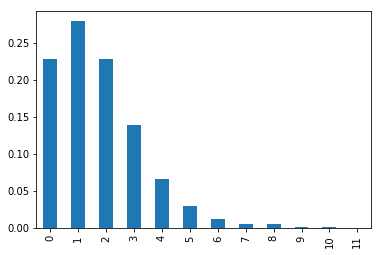

In [21]:
df["Home Goal Count"].value_counts(True).sort_index().plot(kind="bar")

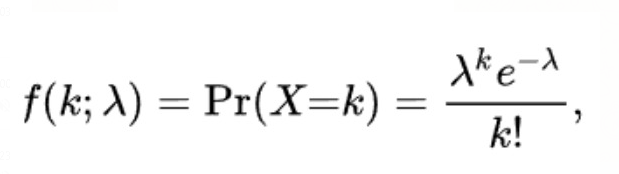

In [44]:
def poisson(lamda, x):
    return lamda**x * np.exp(-lamda) / math.factorial(x)

In [39]:
lamda = df["Home Goal Count"].mean()
x = np.arange(0,11)

poisson = [poisson(lamda, i) for i in x]
poisson

[0.17299353276402096,
 0.30351733800022535,
 0.26626074684655104,
 0.15571825490735888,
 0.0683019611374626,
 0.023967172753118174,
 0.0070084050322476305,
 0.0017566077306293976,
 0.00038524626744178064,
 7.510166529876641e-05,
 1.317659519790227e-05]

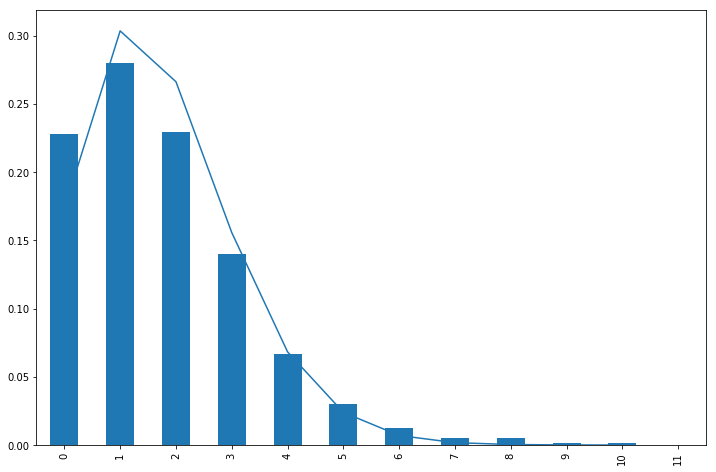

In [40]:
plt.figure(figsize=(12,8))
df["Home Goal Count"].value_counts(True).sort_index().plot(kind="bar")
plt.plot(x, poisson)

In [41]:
df.loc[0]

Stage                            Qualifying
Round                 Qual. Round 1 | Leg 1
Group                                   NaN
Date                (Tue) 15 Jul 2008 (W28)
Team 1             Inter Baku PIK › AZE (1)
FT                                      0-0
HT                                      0-0
Team 2                 Rabotnicki › MKD (1)
∑FT                                     NaN
ET                                      NaN
P                                       NaN
Comments                                NaN
Adj Date                         2008-07-15
Year                                   2008
Home Team                   Inter Baku PIK 
Home Team Ctry                          AZE
Away Team                       Rabotnicki 
Away Team Ctry                          MKD
Home Goal Count                           0
Away Goal Count                           0
Total Goal                                0
Name: 0, dtype: object

In [45]:
df["Total Goal"] = df["Away Goal Count"] + df["Home Goal Count"]

In [46]:
df["Total Goal"].mean()

2.8162953921269454

In [47]:
lamda = df["Total Goal"].mean()
x = np.arange(0,11)

poisson1 = [poisson(lamda, i) for i in x]
poisson1

[0.059827168878673655,
 0.1684909800370092,
 0.23726018534659107,
 0.22273158890892983,
 0.15681948688133301,
 0.08832999965992203,
 0.04146056183813551,
 0.01668074132281933,
 0.005872236865589701,
 0.0018375504028931389,
 0.000517508473246896]

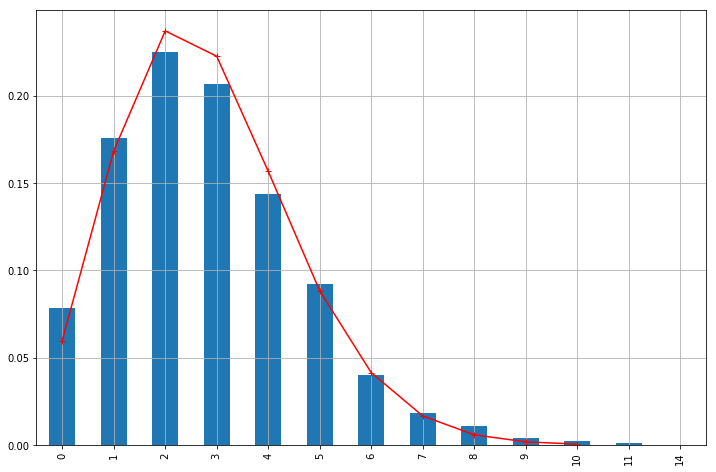

In [54]:
plt.figure(figsize=(12,8))
df["Total Goal"].value_counts(True).sort_index().plot(kind="bar")
plt.plot(x, poisson1, color="red", marker= "+")
plt.grid()

In [55]:
scs.poisson(df["Total Goal"].mean()).sf(0)

0.9401728311213263

In [58]:
sum(poisson1[1:])

0.9400008397364698

In [60]:
ort = df["Total Goal"].mean() / 2
ort

1.4081476960634727

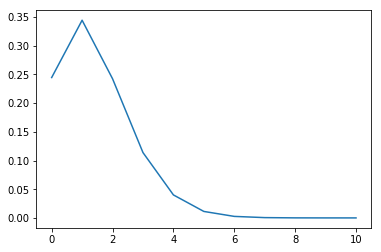

In [67]:
plt.plot(scs.poisson(ort).pmf(range(11)))


In [73]:
df["HT Goal"] = df["HT"].str[0].astype(int) + df["HT"].str[2].astype(int)

In [74]:
df["HT Goal"].mean()

0.9494964906927067

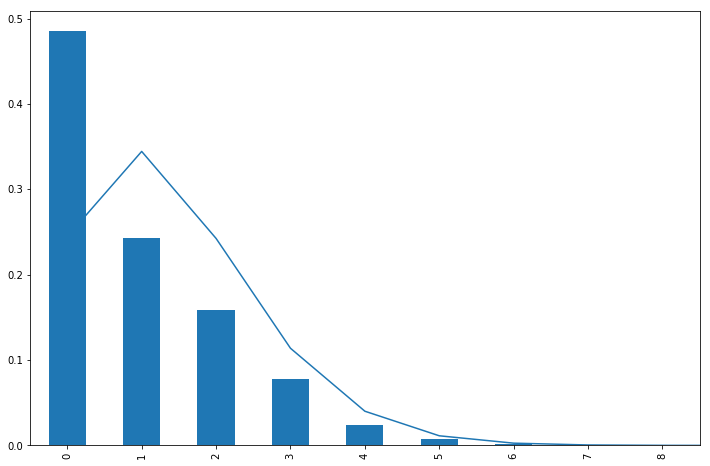

In [75]:
plt.figure(figsize=(12,8))
df["HT Goal"].value_counts(True).sort_index().plot(kind="bar")
plt.plot(scs.poisson(ort).pmf(range(11)))

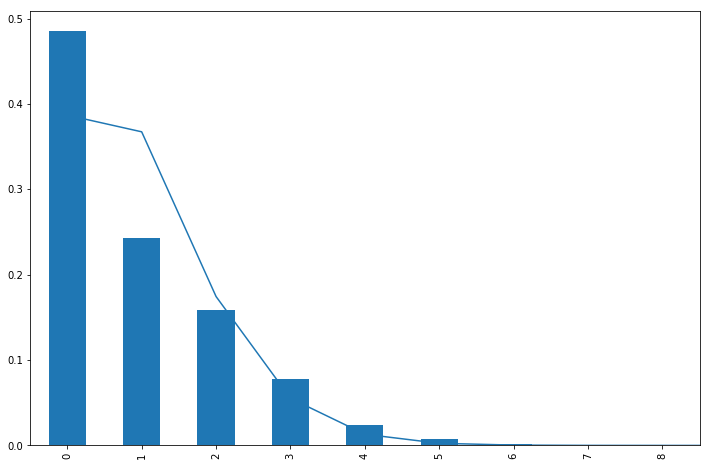

In [76]:
plt.figure(figsize=(12,8))
df["HT Goal"].value_counts(True).sort_index().plot(kind="bar")
plt.plot(scs.poisson(df["HT Goal"].mean()).pmf(range(11)))

In [81]:
df[~(df["Total Goal"]==0)]["Total Goal"].mean()

Year               1994.789404
Home Goal Count       1.903808
Away Goal Count       1.152152
Total Goal            3.055960
HT Goal               1.030298
dtype: float64

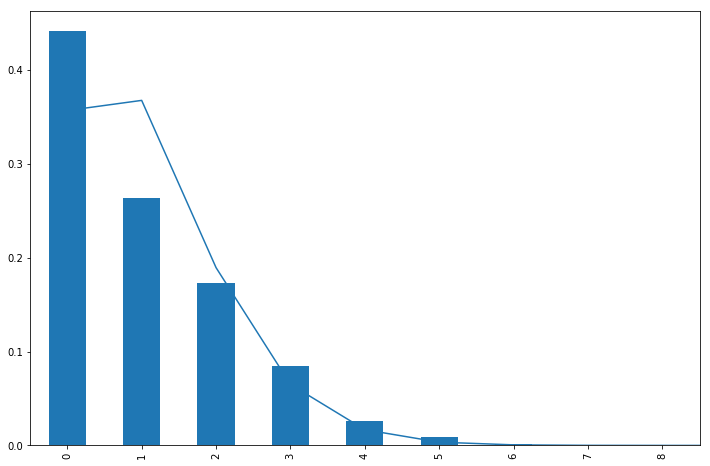

In [82]:
plt.figure(figsize=(12,8))
df[~(df["Total Goal"]==0)]["HT Goal"].value_counts(True).sort_index().plot(kind="bar")
plt.plot(scs.poisson(df[~(df["Total Goal"]==0)]["HT Goal"].mean()).pmf(range(11)))